# 0.0 Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,roc_auc_score
from scikitplot.metrics import plot_precision_recall_curve, plot_roc_curve

# 1.0 Loading data

In [2]:
X,y = make_classification( n_samples=1000,
                           n_classes=2,
                           n_features=8,
                           n_redundant=3,
                           random_state=0
                           )

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# 2.0 Model Training

In [22]:
model = RandomForestClassifier( 
                                n_estimators=3,
                                  max_depth=3, 
                                  n_jobs=1,
                                  verbose=1,
                                  random_state=0 )

model.fit( X_train, y_train )

y_pred = model.predict( X_test)
y_pred_proba = model.predict_proba( X_test )[:,1]
y_pred_proba2 = model.predict_proba( X_test )


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [5]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        97
           1       0.94      0.94      0.94       103

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



/Users/thiago.vale/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

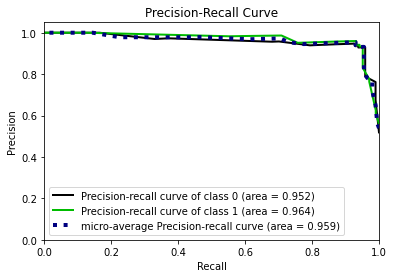

In [6]:
plot_precision_recall_curve(y_test,y_pred_proba2)

# 3.0 ROC Curve

In [7]:
fpr,tpr,th = roc_curve(y_test,y_pred_proba)

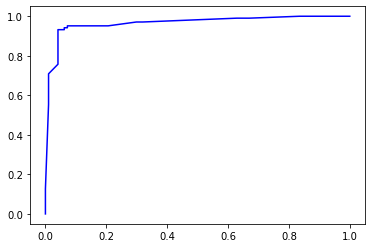

In [8]:
plt.plot(fpr,tpr,color='b')

/Users/thiago.vale/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

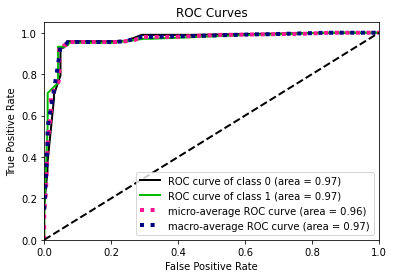

In [9]:
plot_roc_curve(y_test,y_pred_proba2)

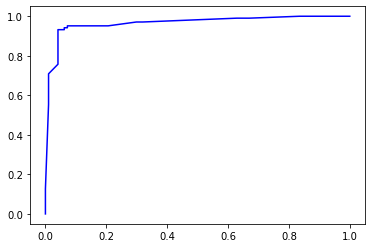

In [10]:
plt.plot(fpr,tpr,color='b')

In [11]:
distinces = np.sqrt( (1-tpr)**2 + fpr**2 )

In [12]:
best_th = th[np.argmin(distinces)]

print(best_th)

0.6196308077887026


In [13]:
y_hat_test = (y_pred_proba >= best_th).astype(int)


In [14]:
accuracy_score(y_test, y_hat_test)

0.945

In [15]:
print(classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        97
           1       0.96      0.93      0.95       103

    accuracy                           0.94       200
   macro avg       0.95      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200

